# CP322 Assignment 1
# Spencer Bellerose
# 160795820

0.2.1 Testing Required Modules

In [4]:
#Testing Numpy
import numpy as np
np.arange(15).reshape(3,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [5]:
#Testing SciPy
import scipy as sp
sp.linspace(0, 10, 5000)

<ipython-input-5-d4783c0fbbd5>:3: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  sp.linspace(0, 10, 5000)


array([0.00000000e+00, 2.00040008e-03, 4.00080016e-03, ...,
       9.99599920e+00, 9.99799960e+00, 1.00000000e+01])

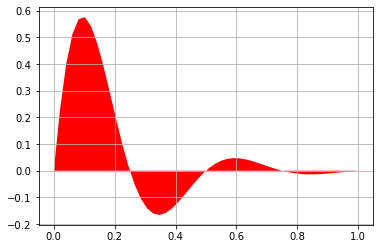

In [6]:
#Testing Matplotlib
import matplotlib.pyplot as plt
x = np.linspace(0,1)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)
plt.fill(x, y, 'r')
plt.grid(True)
plt.show()


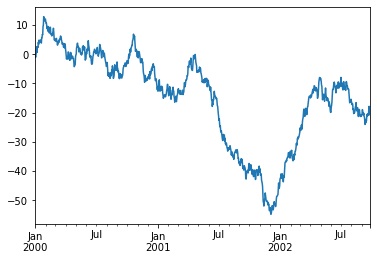

In [7]:
#Testing Pandas
import pandas as pd
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()


In [8]:
#Testing Scikit Learn
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
#Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target
#Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)


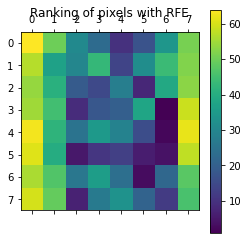

In [9]:
#Plot pixel Ranking
plt.matshow(ranking)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

1. Concept Questions
1.1 Data Exploration
    1) By using bins of depth 3 we can divide up the values into:
        Bin                    Values               Values after Smoothing
        1                      13, 15, 16           14.67, 14.67, 14.67
                                (13 + 15 + 16) / 3 = 14.67 - math for bin 1 
        2                      16, 19, 20           18.33, 18.33, 18.33
                                       Same math for bin 2, with 16, 19, 20
        3                      20, 21, 22           21, 21, 21
        4                      22, 25, 25           24, 24, 24
        5                      25, 25, 30           26.67, 26.67, 26.67
        6                      33, 33, 35           33.67, 33.67, 33.67
        7                      35, 35, 35           35, 35, 35
        8                      36, 40, 45           40.33, 40.33, 40.33
        9                      46, 52, 70           56, 56, 56
     Therefore there are 9 total bins. With such a small sample size the effect of this technique is very major and should therefore only be used on significantly larger sample sizes, as the smoothed values in this set are not an accurate representation of our original values.


   2) X values
         Total - 836
         Mean - 46.444 - 18 values
         SSx = 2970.44
         
        Y values
          Total - 518.1
          Mean - 28.783
          SSy = 1455.945
          
       X and Y combined
         N = 18
         total SSx & SSy = 1700.333
         
      R Calculation
          r = Total SSx & SSy/ (SSx)(SSy)
          r = 1700.333/sqrt((2970.444)(1455.945)) = 0.8176
          
        Therefore since r is close to 1 we know that these two variables are strongly positively correlated

1.2 Decision Tree
    1) The maximum depth of the tree is log(abs(D)). At every level of the tree we compute the attribute selection measure o(n) times. The total tuples at each level is abs(D). Thus computation per level of tree is (n*abs(D)). After summing all of the levels we can obtain a final complexity of o(n*abs(D)*log(abs(D)))

    2) Eager classification is much faster than lazy classification. The reason is because it constructs a generalization model before receiving any new tuples. Lazy classification has a much better hypothesis and is overall a higher cost.   

2.1 Know Your Data

In [10]:
#print first 5 records of your data
file = "loan_data.csv"
data = pd.read_csv(file)
print(data.head(n=5)) 

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

In [11]:
#Demonstrate Basic Statistics of different features
print(data.describe())

'''
_count = data.count()
print("Count:")
print(_count) 
_mean = data.mean()
print()
print("Mean: ")
print(_mean) 
_std = data.std()
print()
print("Standard Deviation: ")
print(_std) 
_min = data.min()
print()
print("Min: ")
print(_min) 
_max = data.max()
print()
print("Max: ")
print(_max) 
'''

       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9577.000000  9577.000000  9577.000000     9577.000000  9577.000000   
mean        0.805054     0.122638   319.033619       10.932082    12.606295   
std         0.396180     0.026848   207.010102        0.614835     6.884227   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.210000   
50%         1.000000     0.122100   268.950000       10.928238    12.660000   
75%         1.000000     0.140700   432.350000       11.291780    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9577.000000        9577.000000  9.577000e+03  9577.000000   
mean    710.844106        4560.748482  1.691177e+04    46.798171   
std      37.971904        2497.060076  3.375727e+04    29.015745   
min     612.0000

'\n_count = data.count()\nprint("Count:")\nprint(_count) \n_mean = data.mean()\nprint()\nprint("Mean: ")\nprint(_mean) \n_std = data.std()\nprint()\nprint("Standard Deviation: ")\nprint(_std) \n_min = data.min()\nprint()\nprint("Min: ")\nprint(_min) \n_max = data.max()\nprint()\nprint("Max: ")\nprint(_max) \n'

In [12]:
#Show the breakup of credit approval status
approval = data["credit.policy"]
print(approval)

0       1
1       1
2       1
3       1
4       1
       ..
9572    0
9573    0
9574    0
9575    0
9576    0
Name: credit.policy, Length: 9577, dtype: int64


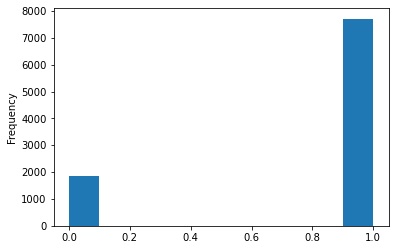

In [13]:
#Plot the Histogram of installments by "approved" and "not approved"
data["credit.policy"].plot.hist() #plots histogram

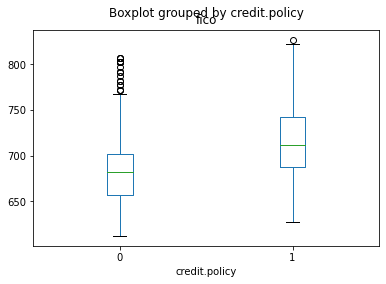

In [14]:
#Illustrate with boxplot Fico score varies between "approved" and "not approved" borrowers
data.boxplot(by="credit.policy", column=["fico"], grid=False)

Data Preprocessing and Model Construction
    2.2.1 Data Preprocessing and Splitting

In [18]:
#Data Preprocessing & Splitting
from sklearn.preprocessing import LabelBinarizer,MinMaxScaler
from sklearn.model_selection import train_test_split

y_enc = LabelBinarizer().fit_transform(data['purpose'])
x_enc = MinMaxScaler().fit_transform(data.drop(columns=['purpose']))
print('x normalized matrix =\n',x_enc)
print('\ny encoded matrix =\n',y_enc)

x_train,x_test = train_test_split(x_enc,test_size=0.3)
print(f'\n x train shape = {x_train.shape} percent={round((x_train.shape[0]/len(x_enc))*100,2)}')
print(f'x test shape = {x_test.shape} percent={round((x_test.shape[0]/len(x_enc))*100,2)}')
y_train,y_test = train_test_split(y_enc,test_size=0.3)
print(f'\n y train shape = {y_train.shape} percent={round((y_train.shape[0]/len(y_enc))*100,2)}')
print(f'yh test shape = {y_test.shape} percent={round((y_test.shape[0]/len(y_enc))*100,2)}')

x normalized matrix =
 [[1.         0.37659847 0.87988794 ... 0.         0.         0.        ]
 [1.         0.3011509  0.22991552 ... 0.         0.         0.        ]
 [1.         0.48401535 0.37988253 ... 0.         0.         0.        ]
 ...
 [0.         0.41751918 0.26180406 ... 0.         0.         1.        ]
 [0.         0.3011509  0.08885091 ... 0.         0.         1.        ]
 [0.         0.63938619 0.36335414 ... 0.         0.         1.        ]]

y encoded matrix =
 [[0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 1 0 0]]

 x train shape = (6703, 13) percent=69.99
x test shape = (2874, 13) percent=30.01

 y train shape = (6703, 7) percent=69.99
yh test shape = (2874, 7) percent=30.01


'credit_card' = 1,0,0,0,0,0
'debit_consolidation' = 0,1,0,0,0,0
'educational' = 0,0,1,0,0,0
'major_purchase' = 0,0,0,1,0,0
small_business = 0,0,0,0,1,0
all_other = 0,0,0,0,0,1

   2.2.2 Training a Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

gini_tree = DecisionTreeClassifier(criterion = "gini")
gini_tree.fit(x_train,y_train)

info_gain_tree = DecisionTreeClassifier(criterion = "gini")
info_gain_tree.fit(x_train,y_train)

DecisionTreeClassifier()

   2.3 Performance Evaluation and Analysis

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

gini_score = info_gain_tree.score(x_test,y_test)
info_gain_score = gini_tree.score(x_test,y_test)
print(f'gini accuracy:{gini_score} info_gain accuracy:{info_gain_score}')
print('------------------------')

for i in range(3):
    print("\nExample ", i)
    gini_test = gini_tree.predict(x_test)
    gini_conf = confusion_matrix(y_test[i], info_gain_test[i])
    gini_eval = precision_recall_fscore_support(y_test[i], gini_test[i])
    print(f'\nGini:\nprecision={gini_eval[0][0]} recall={gini_eval[1][0]} fscore={gini_eval[2][0]}')
    print("Confusion Matrix:\n", gini_conf)

    info_gain_test = info_gain_tree.predict(x_test)
    info_gain_conf = confusion_matrix(y_test[i], info_gain_test[i])
    info_gain_eval = precision_recall_fscore_support(y_test[i], info_gain_test[i])
    print(f'\nInfo_Gain:\nprecision={info_gain_eval[0][0]}\nrecall={info_gain_eval[1][0]}\nfscore={info_gain_eval[2][0]}')
    print("Confusion Matrix:\n", info_gain_conf)
    print('------------------------')

gini accuracy:0.26826722338204595 info_gain accuracy:0.2595685455810717
------------------------

Example  0

Gini:
precision=1.0 recall=1.0 fscore=1.0
Confusion Matrix:
 [[6 0]
 [0 1]]

Info_Gain:
precision=1.0
recall=1.0
fscore=1.0
Confusion Matrix:
 [[6 0]
 [0 1]]
------------------------

Example  1

Gini:
precision=0.8333333333333334 recall=0.8333333333333334 fscore=0.8333333333333334
Confusion Matrix:
 [[5 1]
 [1 0]]

Info_Gain:
precision=0.8333333333333334
recall=0.8333333333333334
fscore=0.8333333333333334
Confusion Matrix:
 [[5 1]
 [1 0]]
------------------------

Example  2

Gini:
precision=0.8333333333333334 recall=0.8333333333333334 fscore=0.8333333333333334
Confusion Matrix:
 [[5 1]
 [1 0]]

Info_Gain:
precision=0.8333333333333334
recall=0.8333333333333334
fscore=0.8333333333333334
Confusion Matrix:
 [[5 1]
 [1 0]]
------------------------
